<a href="https://colab.research.google.com/github/luckguy/SS2022/blob/main/SS02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>連續時間複數弦波訊號</font>



## Standard Signals

Certain [signals](https://en.wikipedia.org/wiki/Signal_%28electrical_engineering%29) play an important role in the theory and practical application of [signal processing](https://en.wikipedia.org/wiki/Signal_processing). They emerge from the theory of signals and systems, are used to characterize the properties of linear time-invariant (LTI) systems or frequently occur in practical applications. These standard signals are introduced and illustrated in the following. The treatise is limited to one-dimensional deterministic time- and amplitude-continuous signals.

### 複數弦波訊號

The complex exponential signal over time $t$ is defined by the [complex exponential function](https://en.wikipedia.org/wiki/Exponential_function#Complex_plane)

\begin{equation}
x(t) = e^{s t} 
\end{equation}

where $s = \sigma + j \omega_0$ denotes the complex frequency with $\sigma, \omega \in \mathbb{R}$ and $j$ the imaginary unit $(j^2=-1)$. The signal is often used as a generalized representation of harmonic signals. Using [Euler's formula](https://en.wikipedia.org/wiki/Euler's_formula) above definition can be reformulated as

\begin{equation}
x(t) = e^{(\sigma + j \omega_0) t} = e^{\sigma_0 t} \cos(\omega_0 t) + j e^{\sigma t} \sin(\omega_0 t)
\end{equation}

The real/imaginary part of the exponential signal is given by a weighted cosine/sine with angular frequency $\omega_0 = 2 \pi f_0$. For $t>0$, the time-dependent weight $e^{\sigma t}$ is

* $\sigma < 0$, 訊號指數遞減
* constantly one for $\sigma = 0$,
* $\sigma > 0$, 訊號指數遞增

and vice-versa for $t<0$. The complex exponential signal is used to model harmonic signals with constant or exponentially decreasing/increasing amplitude.

**Example**

The following example illustrates the complex exponential signal and its parameters. The Python module [SymPy](http://docs.sympy.org/latest/index.html) is used for this purpose. It provides functionality for symbolic variables and functions, as well as their calculus. The required symbolic variables need to be defined explicitly before usage. In the example $t$, $\omega$ and $\sigma$ are defined as real-valued symbolic variables, followed by the definition of the exponential signal.

In [ ]:
import sympy as sym
sym.init_printing()

t, sigma, omega = sym.symbols('t sigma omega', real=True)
s = sigma + 1j*omega
x = sym.exp(s*t)
x

Now specific values for the complex frequency $s = \sigma + j \omega$ are considered for illustration. For this purpose a new signal is defined by substituting both $\sigma$ and $\omega$ with specific values. The real and imaginary part of the signal is plotted for illustration.

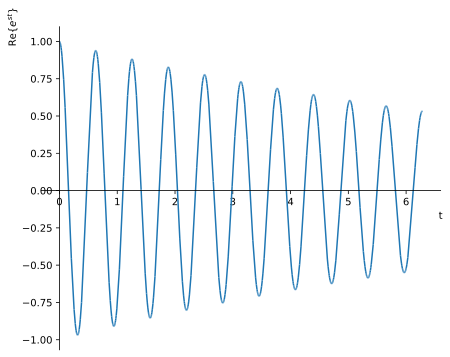

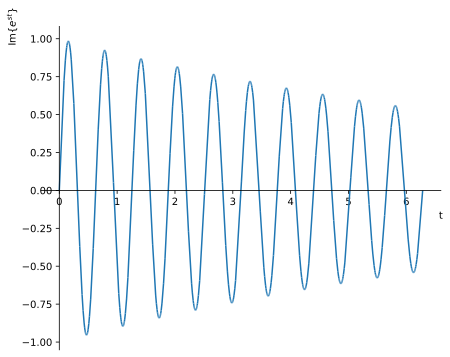

In [ ]:
# 設定 omega 與 sigma 數值
y = x.subs({omega: 10, sigma: -.1})

sym.plot(sym.re(y), (t, 0, 2*sym.pi), ylabel=r'Re{$e^{st}$}')
sym.plot(sym.im(y), (t, 0, 2*sym.pi), ylabel=r'Im{$e^{st}$}');

**Exercise**

* Try other values for `omega` and `sigma` to create signals with increasing/constant/decreasing amplitudes and different angular frequencies.

#<font color=blue>離散時間複數弦波訊號</font>


### Complex Exponential Signal

The discrete complex exponential signal is defined by the [complex exponential function](https://en.wikipedia.org/wiki/Exponential_function#Complex_plane)

\begin{equation}
x[k] = e^{(\Sigma + j \Omega) \, k} = z^k
\end{equation}

where $z = e^{\Sigma + j \Omega}$ denotes the complex frequency $z \in \mathbb{C}$ with $\Sigma, \Omega \in \mathbb{R}$. The discrete complex exponential signal can be related to the [continuous complex exponential signal](../continuous_signals/standard_signals.ipynb#Complex-Exponential-Signal) $x(t) = e^{(\sigma + j \omega) t}$ by sampling

\begin{equation}
x[k] = x(k T) = e^{(\sigma + j \omega) k T} = e^{( \sigma T + j \omega T ) k}
\end{equation}

where $T$ denotes the sampling interval. Comparison to above definition of the discrete signal reveals that $\Sigma = \sigma T$ and $\Omega = \omega T$. Due to this relation, the latter is termed as *normalized frequency* $\Omega$. Using [Euler's formula](https://en.wikipedia.org/wiki/Euler's_formula), the definition of the complex exponential signal can be reformulated as

\begin{equation}
x[k] = e^{\Sigma k} \cos[\Omega k] + j e^{\Sigma k} \sin[\Omega k]
\end{equation}

The real/imaginary part of the exponential signal is given by a weighted discrete cosine/sine with normalized frequency $\Omega$. The normalized frequency $\Omega$ is ambiguous due to the periodicity of the cosine/sine function for discrete $k$. For instance

\begin{equation}
\cos[\Omega k] = \cos[(\Omega + n \cdot 2 \pi) \cdot k]
\end{equation}

with $n \in \mathbb{Z}$. It can be concluded that the normalized frequency $\Omega$ is unique for $-\pi < \Omega < \pi$. This also becomes evident when considering the sampling of a continuous exponential signal, as shown above. For [critical sampling](../sampling/ideal.ipynb#Sampling-Theorem-for-Low-Pass-Signals) the sampling frequency $\omega_\text{s} = 2 \cdot \omega$. From $T = \frac{2 \pi}{\omega_\text{s}}$ follows $\Omega = \omega T = \pi$. It can be concluded that the normalized frequency $\Omega = \pm \pi$ represents the highest/lowest normalized frequency a sampled signal can represent.

The complex exponential function is only periodic with respect to the discrete index $k$, if

\begin{equation}
x[k] = x[k + n \cdot N_\text{p}]
\end{equation}

holds for $n \in \mathbb{Z}$ and $N_\text{p} \in \mathbb{N}$. The periodicity of the complex exponential function is given as

\begin{equation}
N_\text{p} = \frac{2 \pi}{\Omega}
\end{equation}

It follows from the requirement $N_\text{p} \in \mathbb{N}$ for a periodic sequence, that not all normalized frequencies $\Omega$ result in a periodic discrete complex exponential signal. Only $\Omega = \frac{2 \pi}{N_\text{p}}$ with $N_\text{p} \in \mathbb{N}$ is periodic with period $N_\text{p}$. Sampling of a continuous complex exponential signal may result in an aperiodic discrete complex exponential signal.

The complex exponential signal can be expressed in terms of its magnitude and phase

\begin{equation}
x[k] = z^k = |z|^k \cdot e^{j \varphi(z) k}
\end{equation}

where by comparison with its definition $|z| = |e^\Sigma|$ and $\varphi(z) = \Omega$. This finding allows an interpretation of the complex frequency $z$. Its phase $\varphi(z)$ is equal to the normalized frequency $\Omega$ of its harmonic part $e^{j \Omega k}$. This is weighted by the magnitude $|z|^k$. With increasing index $k >0$, the magnitude of the complex exponential signal is

* exponentially decaying for $|z| < 1$ ($\Sigma < 0$)
* constantly one for $|z| = 1$ ($\Sigma = 0$)
* exponentially growing for $|z| > 1$ ($\Sigma > 0$).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def exponential_signal(k, Sigma, Omega):
    return np.exp((Sigma + 1j * Omega) * k)


def plot_signal(k, x):
    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    plt.stem(k, np.real(x))
    plt.xlabel('$k$')
    plt.ylabel(r'$\Re \{ x[k] \}$')

    plt.subplot(122)
    plt.stem(k, np.imag(x))
    plt.xlabel('$k$')
    plt.ylabel(r'$\Im \{ x[k] \}$')
    plt.tight_layout()